In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os


In [21]:
os.chdir(os.getcwd())
# for MAC 
data_set = "data/CO2 Decays_removedOne.csv"

# for Windows
#data_set = "data\CO2 Decays_removedOne.csv"

df = pd.read_csv(data_set)

# Preprocess House A
df_a1 = df[['Hour', 'A First Decay']].dropna()
hour_a1 = df_a1['Hour'].tolist()
a1 = df_a1['A First Decay'].tolist()

df_a2 = df[['Hour', 'A Second Decay']].dropna()
hour_a2 = df_a2['Hour'].tolist()
a2 = df_a2['A Second Decay'].tolist()

# Preprocess House R
df_r1 = df[['Hours', 'R First Decay']].dropna()
hours_r1 = df_r1['Hours'].tolist()
r1 = df_r1['R First Decay'].tolist()

df_r2 = df[['Hours', 'R Second Decay']].dropna()
hours_r2 = df_r2['Hours'].tolist()
r2 = df_r2['R Second Decay'].tolist()

df_r3 = df[['Hours', 'R Third Decay']].dropna()
hours_r3 = df_r3['Hours'].tolist()
r3 = df_r3['R Third Decay'].tolist()

# Preprocess House T
df_t1 = df[['Hours', 'T First Decay']].dropna()
hours_t1 = df_t1['Hours'].tolist()
t1 = df_t1['T First Decay'].tolist()


In [22]:
def fit_slope(x, y, cutoff=2):
    x_fit = [xi for xi in x if xi <= cutoff]
    y_fit = [yi for xi, yi in zip(x, y) if xi <= cutoff]
    slope, _ = np.polyfit(x_fit, y_fit, 1)
    return slope

m_a1 = fit_slope(hour_a1, a1)
m_a2 = fit_slope(hour_a2, a2)
m_r1 = fit_slope(hours_r1, r1)
m_r2 = fit_slope(hours_r2, r2)
m_r3 = fit_slope(hours_r3, r3)
m_t1 = fit_slope(hours_t1, t1)


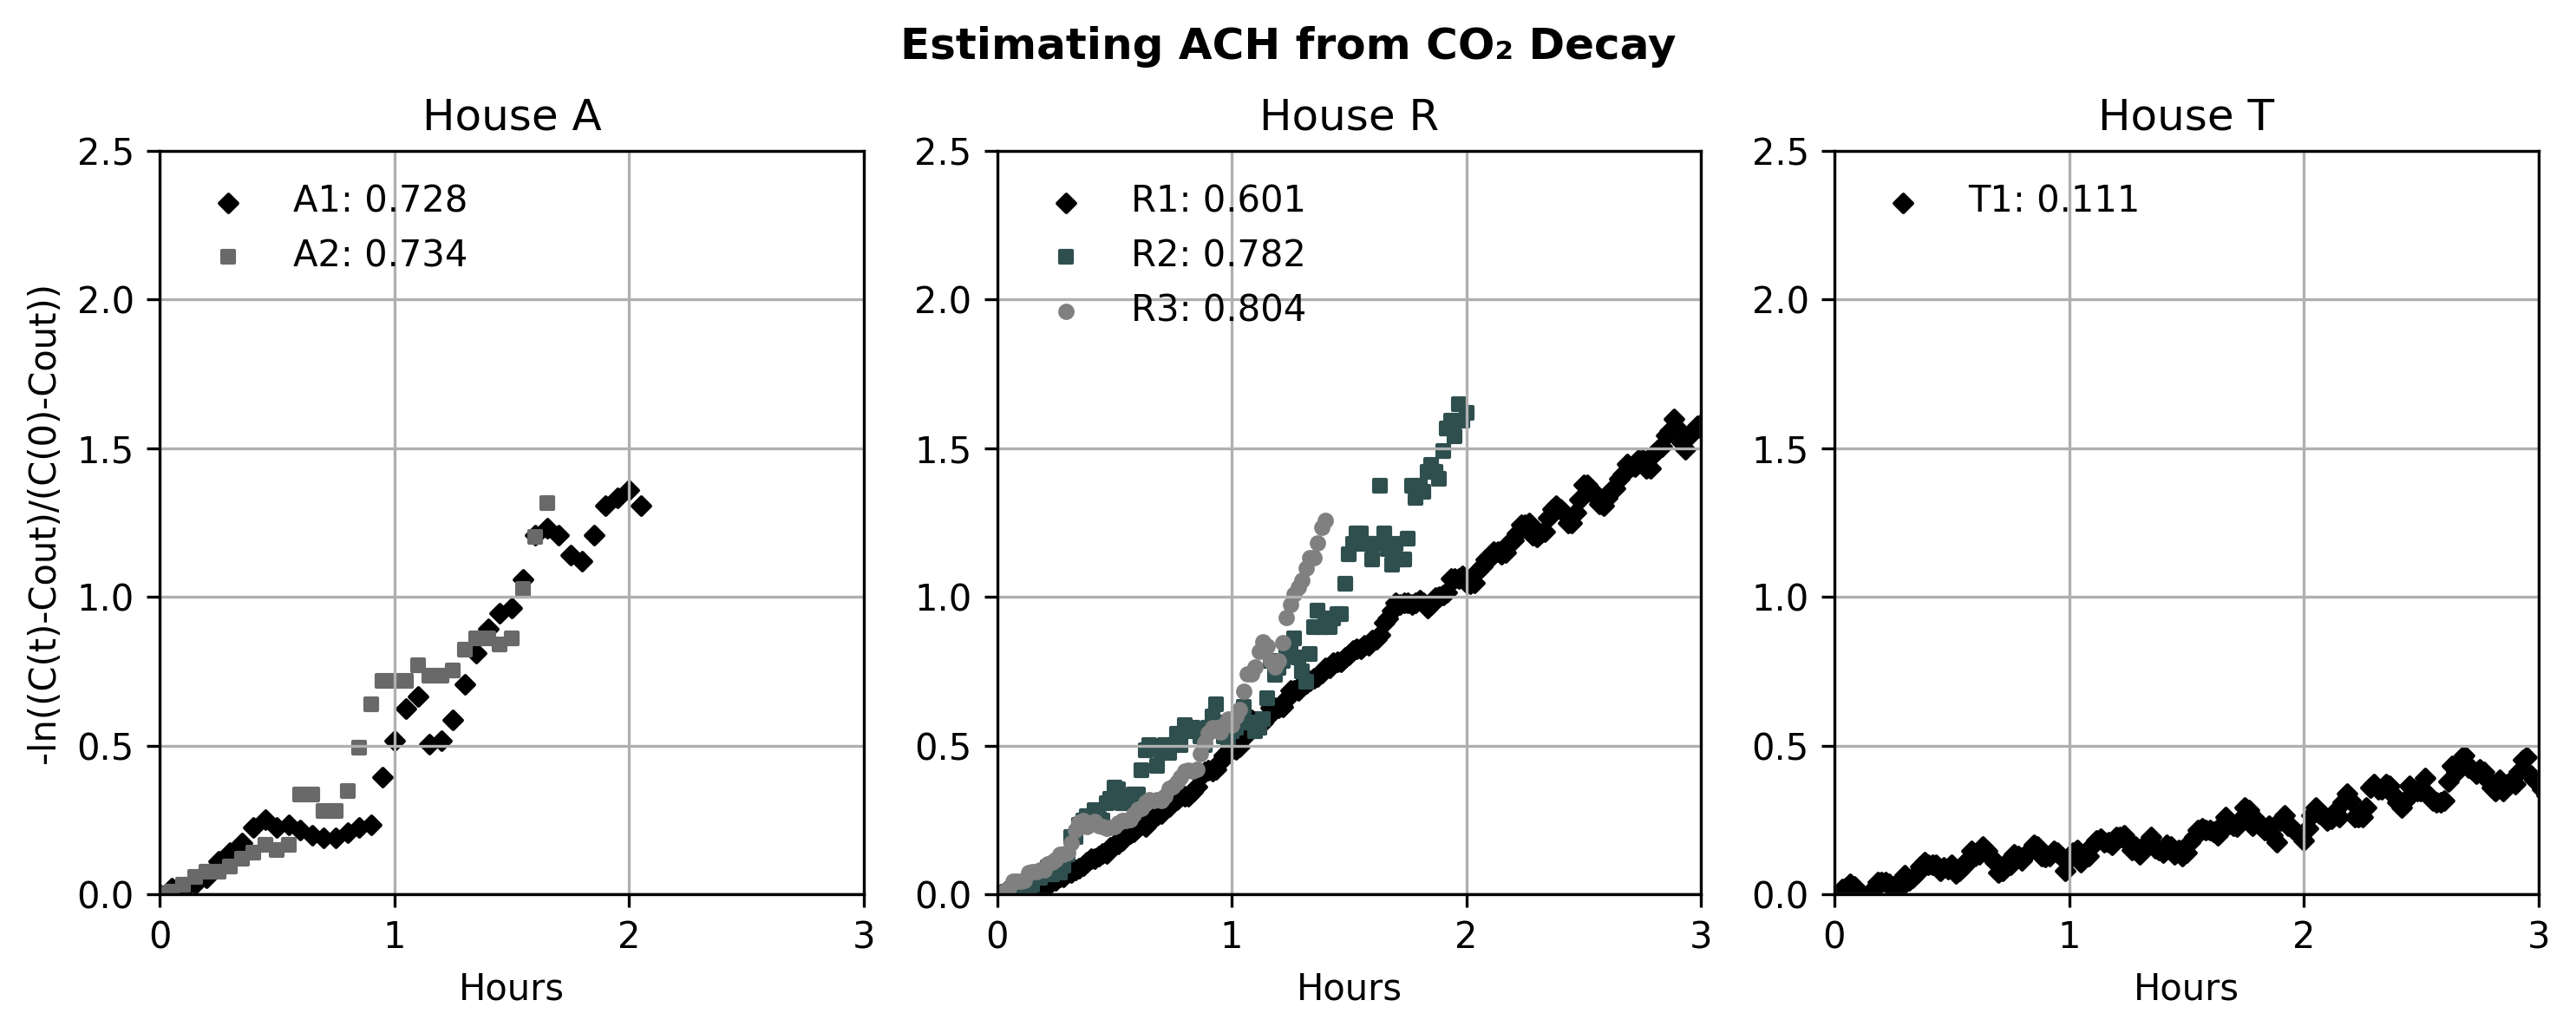

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), dpi=300)
marker_size = 6
legend_fontsize = 10

# House A
axs[0].scatter(hour_a1, a1, label=f'A1: {round(m_a1, 3)}', s=marker_size**1.4, marker='D', color='black')
axs[0].scatter(hour_a2, a2, label=f'A2: {round(m_a2, 3)}', s=marker_size**1.4, marker='s', color='dimgray')
axs[0].axhline(0, color='black', lw=0.8)
axs[0].set_title('House A')
axs[0].set_ylabel('-ln((C(t)-Cout)/(C(0)-Cout))')

# House R
axs[1].scatter(hours_r1, r1, label=f'R1: {round(m_r1, 3)}', s=marker_size**1.4, marker='D', color='black')
axs[1].scatter(hours_r2, r2, label=f'R2: {round(m_r2, 3)}', s=marker_size**1.4, marker='s', color='darkslategray')
axs[1].scatter(hours_r3, r3, label=f'R3: {round(m_r3, 3)}', s=marker_size**1.4, marker='o', color='gray')
axs[1].axhline(0, color='black', lw=0.8)
axs[1].set_title('House R')


# House T
axs[2].scatter(hours_t1, t1, label=f'T1: {round(m_t1, 3)}', s=marker_size**1.4, marker='D', color='black')
axs[2].axhline(0, color='black', lw=0.8)
axs[2].set_title('House T')

# Formatting
for ax in axs:
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 2.5])
    ax.set_xlabel('Hours')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.legend(fontsize=legend_fontsize, frameon=False, loc='upper left')
    ax.grid(True)

axs[1].set_yticks(np.arange(0, 3, 0.5))  # House R
axs[2].set_yticks(np.arange(0, 3, 0.5))  # House T

fig.suptitle('Estimating ACH from CO₂ Decay', fontsize=12, weight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
